<a href="https://www.kaggle.com/code/mosesmoncy/hazard-prediction-using-nlp?scriptVersionId=131636164" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In recent years, there has been a remarkable advancement in the fields of machine learning and natural language processing (NLP). These technologies have revolutionized various domains, and one such area where they have made significant strides is hazard prediction. By leveraging the vast amounts of data available today, machine learning algorithms combined with NLP techniques can help us anticipate and mitigate potential hazards more effectively than ever before. In this article, we will explore how machine learning and NLP are utilized for hazard prediction, their benefits, and potential challenges..

Model is created to predict whether the hazard is 'Jeopardy!','Double Jeopardy!','Final Jeopardy!'or 'Tiebreak' using Natural Language Processing..

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import re 

In [2]:
a=pd.read_csv('/kaggle/input/jeopardy-csv/JEOPARDY_CSV.csv',encoding='ISO-8859-1')
a

,Show Number,Air Date,Round,Category,Value,Question,Answer
0,4680,2004-12-31,Jeopardy!,HISTORY,$200,"For the last 8 years of his life, Galileo was ...",Copernicus
1,4680,2004-12-31,Jeopardy!,ESPN's TOP 10 ALL-TIME ATHLETES,$200,No. 2: 1912 Olympian; football star at Carlisl...,Jim Thorpe
2,4680,2004-12-31,Jeopardy!,EVERYBODY TALKS ABOUT IT...,$200,The city of Yuma in this state has a record av...,Arizona
3,4680,2004-12-31,Jeopardy!,THE COMPANY LINE,$200,"In 1963, live on ""The Art Linkletter Show"", th...",McDonald's
4,4680,2004-12-31,Jeopardy!,EPITAPHS & TRIBUTES,$200,"Signer of the Dec. of Indep., framer of the Co...",John Adams
...,...,...,...,...,...,...,...
216925,4999,2006-05-11,Double Jeopardy!,RIDDLE ME THIS,$2000,This Puccini opera turns on the solution to 3 ...,Turandot
216926,4999,2006-05-11,Double Jeopardy!,"""T"" BIRDS",$2000,In North America this term is properly applied...,a titmouse
216927,4999,2006-05-11,Double Jeopardy!,AUTHORS IN THEIR YOUTH,$2000,"In Penny Lane, where this ""Hellraiser"" grew up...",Clive Barker
216928,4999,2006-05-11,Double Jeopardy!,QUOTATIONS,$2000,"From Ft. Sill, Okla. he made the plea, Arizona...",Geronimo


In [3]:
a.head()

,Show Number,Air Date,Round,Category,Value,Question,Answer
0,4680,2004-12-31,Jeopardy!,HISTORY,$200,"For the last 8 years of his life, Galileo was ...",Copernicus
1,4680,2004-12-31,Jeopardy!,ESPN's TOP 10 ALL-TIME ATHLETES,$200,No. 2: 1912 Olympian; football star at Carlisl...,Jim Thorpe
2,4680,2004-12-31,Jeopardy!,EVERYBODY TALKS ABOUT IT...,$200,The city of Yuma in this state has a record av...,Arizona
3,4680,2004-12-31,Jeopardy!,THE COMPANY LINE,$200,"In 1963, live on ""The Art Linkletter Show"", th...",McDonald's
4,4680,2004-12-31,Jeopardy!,EPITAPHS & TRIBUTES,$200,"Signer of the Dec. of Indep., framer of the Co...",John Adams


In [4]:
a.tail()

,Show Number,Air Date,Round,Category,Value,Question,Answer
216925,4999,2006-05-11,Double Jeopardy!,RIDDLE ME THIS,$2000,This Puccini opera turns on the solution to 3 ...,Turandot
216926,4999,2006-05-11,Double Jeopardy!,"""T"" BIRDS",$2000,In North America this term is properly applied...,a titmouse
216927,4999,2006-05-11,Double Jeopardy!,AUTHORS IN THEIR YOUTH,$2000,"In Penny Lane, where this ""Hellraiser"" grew up...",Clive Barker
216928,4999,2006-05-11,Double Jeopardy!,QUOTATIONS,$2000,"From Ft. Sill, Okla. he made the plea, Arizona...",Geronimo
216929,4999,2006-05-11,Final Jeopardy!,HISTORIC NAMES,None,A silent movie title includes the last name of...,Grigori Alexandrovich Potemkin


In [5]:
a.shape

(216930, 7)

In [6]:
a.dtypes

Show Number     int64
 Air Date      object
 Round         object
 Category      object
 Value         object
 Question      object
 Answer        object
dtype: object

In [7]:
a.isna().sum()

Show Number    0
 Air Date      0
 Round         0
 Category      0
 Value         0
 Question      0
 Answer        2
dtype: int64

In [8]:
a.columns

Index(['Show Number', ' Air Date', ' Round', ' Category', ' Value',
       ' Question', ' Answer'],
      dtype='object')

Jeopardy!           107384
Double Jeopardy!    105912
Final Jeopardy!       3631
Tiebreaker               3
Name:  Round, dtype: int64

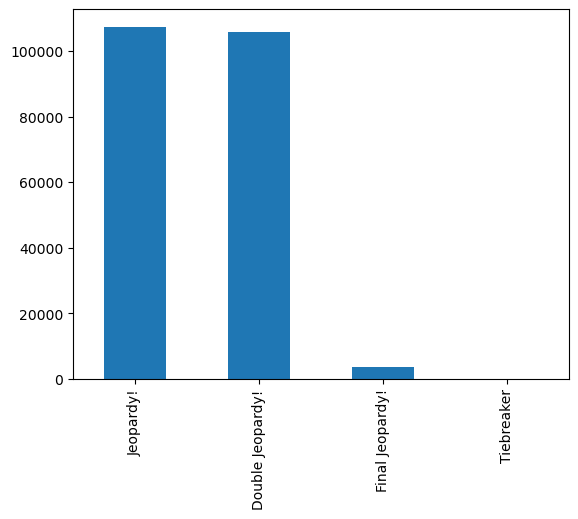

In [9]:
a[' Round'].value_counts().plot(kind='bar')
a[' Round'].value_counts()

In [10]:
a.columns

Index(['Show Number', ' Air Date', ' Round', ' Category', ' Value',
       ' Question', ' Answer'],
      dtype='object')

In [11]:
from sklearn.preprocessing import LabelEncoder

la=LabelEncoder()
cols=[' Air Date', ' Category', ' Value', ' Answer']
a[cols]=a[cols].apply(la.fit_transform)
a

,Show Number,Air Date,Round,Category,Value,Question,Answer
0,4680,2021,Jeopardy!,11641,63,"For the last 8 years of his life, Galileo was ...",16646
1,4680,2021,Jeopardy!,8789,63,No. 2: 1912 Olympian; football star at Carlisl...,28044
2,4680,2021,Jeopardy!,8886,63,The city of Yuma in this state has a record av...,10073
3,4680,2021,Jeopardy!,22977,63,"In 1963, live on ""The Art Linkletter Show"", th...",33245
4,4680,2021,Jeopardy!,8763,63,"Signer of the Dec. of Indep., framer of the Co...",28257
...,...,...,...,...,...,...,...
216925,4999,2340,Double Jeopardy!,19463,64,This Puccini opera turns on the solution to 3 ...,50086
216926,4999,2340,Double Jeopardy!,1291,64,In North America this term is properly applied...,59452
216927,4999,2340,Double Jeopardy!,4560,64,"In Penny Lane, where this ""Hellraiser"" grew up...",16025
216928,4999,2340,Double Jeopardy!,19010,64,"From Ft. Sill, Okla. he made the plea, Arizona...",23251


<AxesSubplot:xlabel=' Answer', ylabel='Count'>

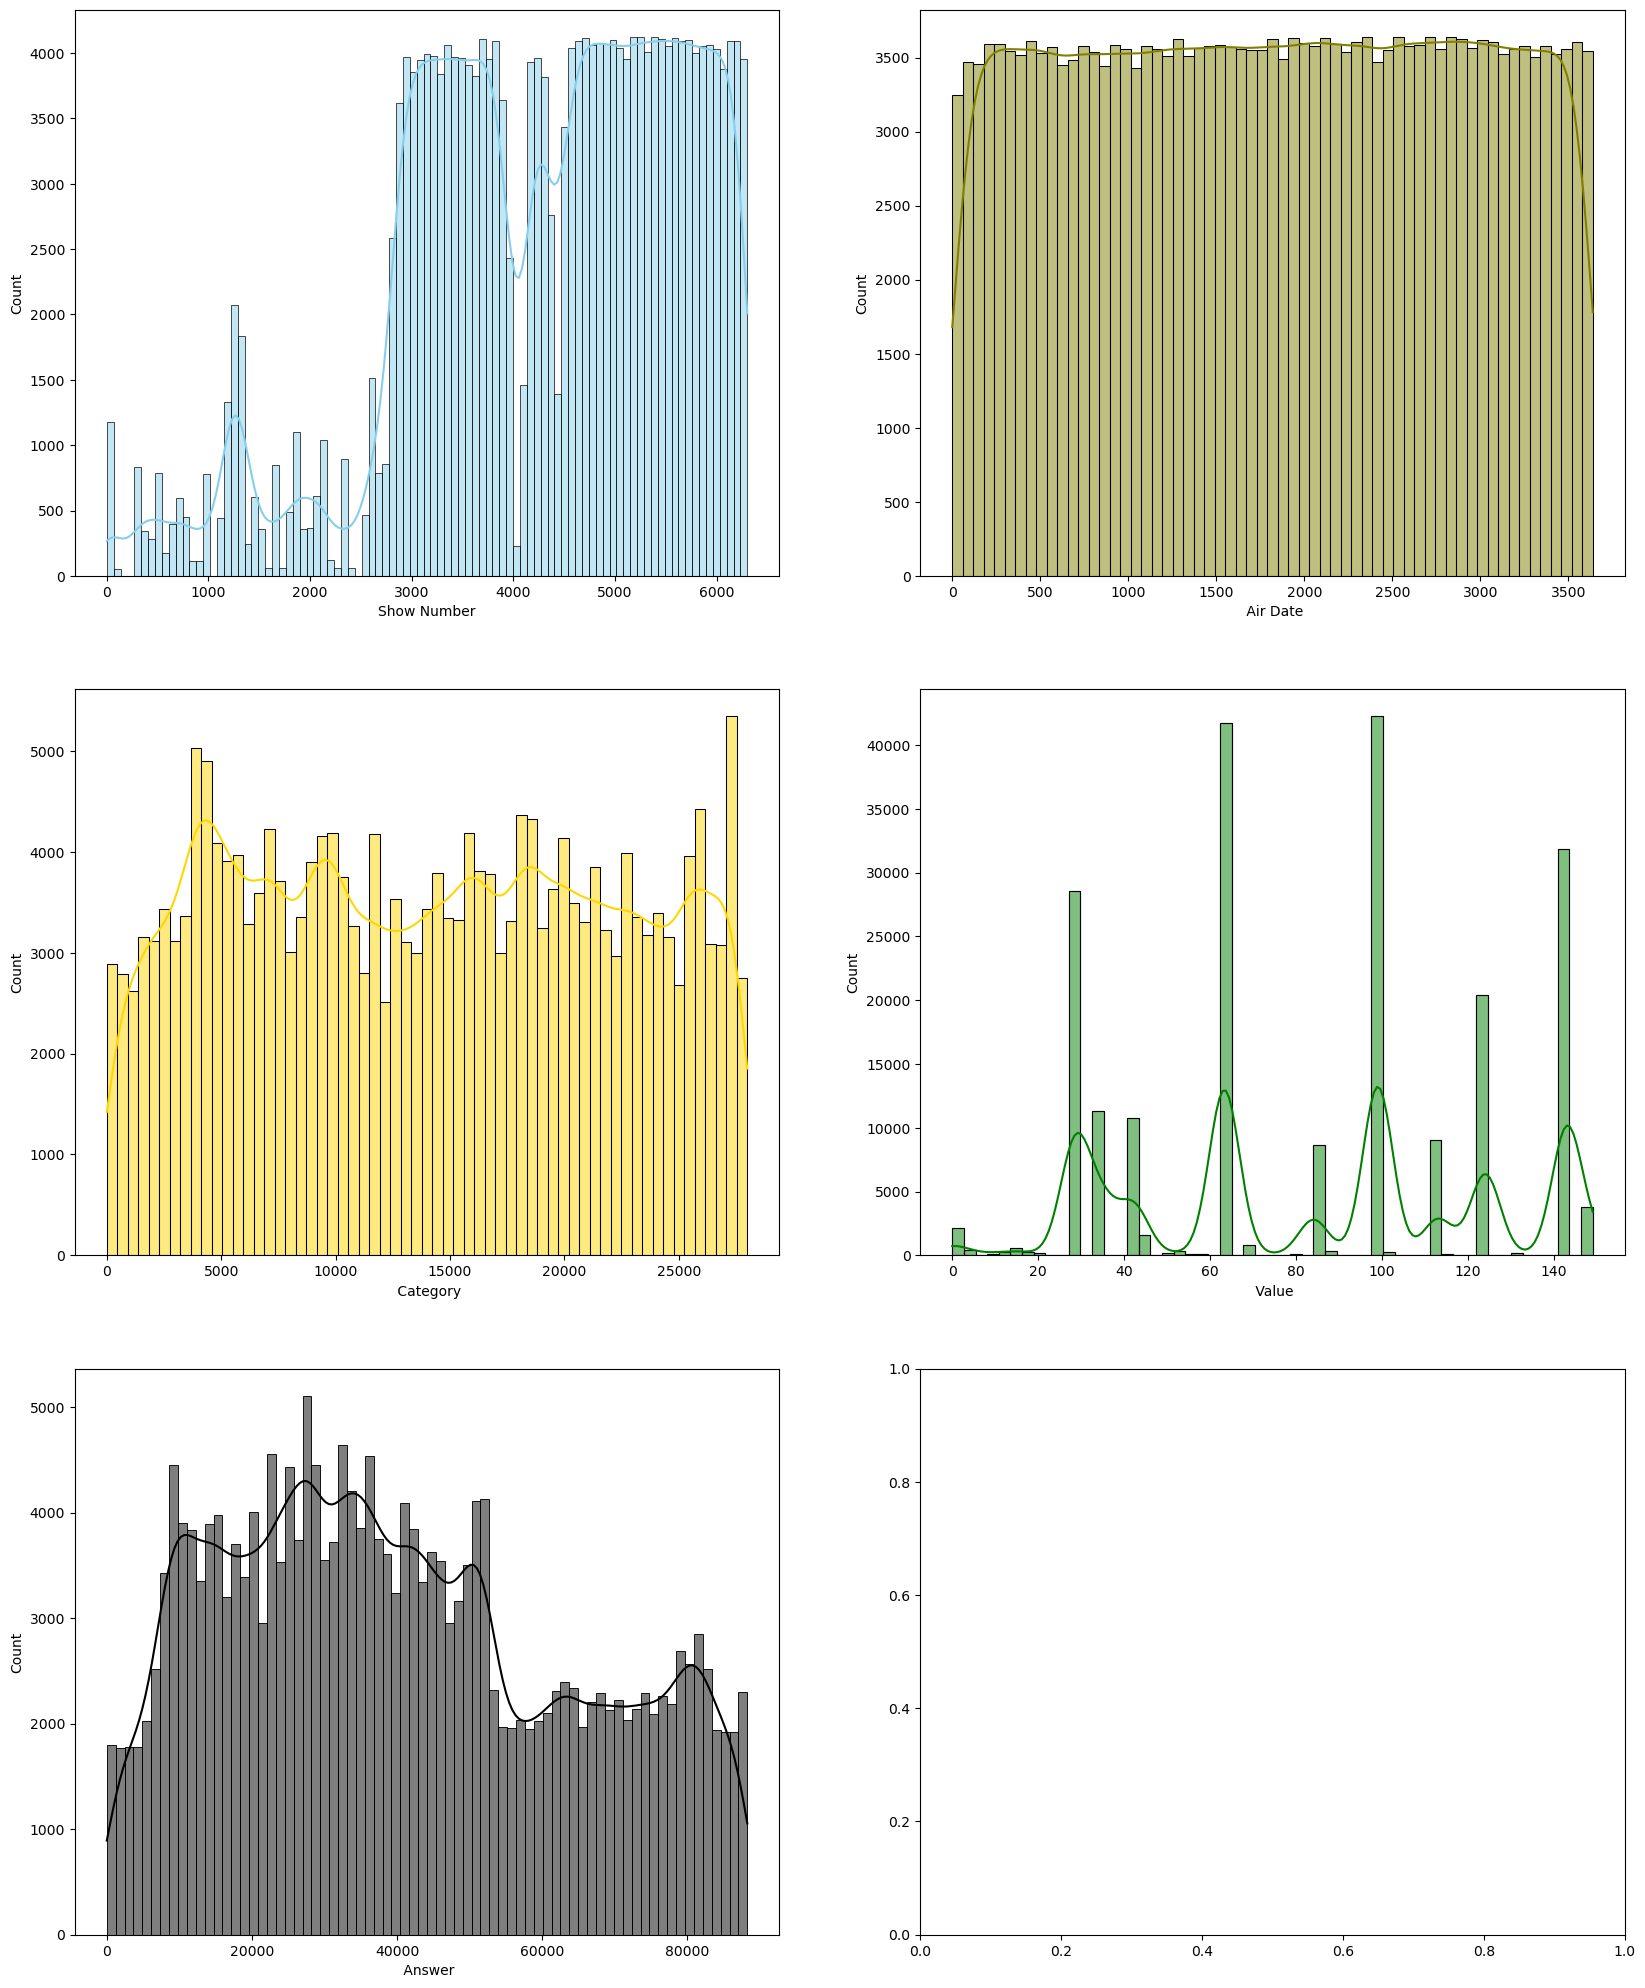

In [12]:
fialigng, axs = plt.subplots(3, 2, figsize=(20, 25))

sns.histplot(data=a['Show Number'], kde=True, color="skyblue", ax=axs[0, 0])
sns.histplot(data=a[' Air Date'], kde=True, color="olive", ax=axs[0, 1])
sns.histplot(data=a[' Category'], kde=True, color="gold", ax=axs[1, 0])
sns.histplot(data=a[' Value'], kde=True, color="green", ax=axs[1, 1])
sns.histplot(data=a[' Answer'], kde=True, color="black", ax=axs[2, 0])

In [13]:
a=a.drop([' Air Date', ' Category', ' Value', ' Answer','Show Number'],axis=1)
a

,Round,Question
0,Jeopardy!,"For the last 8 years of his life, Galileo was ..."
1,Jeopardy!,No. 2: 1912 Olympian; football star at Carlisl...
2,Jeopardy!,The city of Yuma in this state has a record av...
3,Jeopardy!,"In 1963, live on ""The Art Linkletter Show"", th..."
4,Jeopardy!,"Signer of the Dec. of Indep., framer of the Co..."
...,...,...
216925,Double Jeopardy!,This Puccini opera turns on the solution to 3 ...
216926,Double Jeopardy!,In North America this term is properly applied...
216927,Double Jeopardy!,"In Penny Lane, where this ""Hellraiser"" grew up..."
216928,Double Jeopardy!,"From Ft. Sill, Okla. he made the plea, Arizona..."


In [14]:
# dropping irrelevant rows from 'target'

a.drop(a.index[(a[' Round']=='Irrelevant')],axis=0,inplace=True)
a

,Round,Question
0,Jeopardy!,"For the last 8 years of his life, Galileo was ..."
1,Jeopardy!,No. 2: 1912 Olympian; football star at Carlisl...
2,Jeopardy!,The city of Yuma in this state has a record av...
3,Jeopardy!,"In 1963, live on ""The Art Linkletter Show"", th..."
4,Jeopardy!,"Signer of the Dec. of Indep., framer of the Co..."
...,...,...
216925,Double Jeopardy!,This Puccini opera turns on the solution to 3 ...
216926,Double Jeopardy!,In North America this term is properly applied...
216927,Double Jeopardy!,"In Penny Lane, where this ""Hellraiser"" grew up..."
216928,Double Jeopardy!,"From Ft. Sill, Okla. he made the plea, Arizona..."


Hence No irrelevant data

Jeopardy!           107384
Double Jeopardy!    105912
Final Jeopardy!       3631
Tiebreaker               3
Name:  Round, dtype: int64

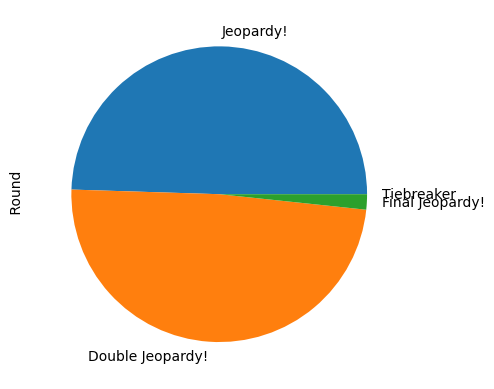

In [15]:
a[' Round'].value_counts().plot(kind='pie')
a[' Round'].value_counts()

In [16]:
# replacing categorical values from Round

a[' Round']=a[' Round'].replace('Jeopardy!','1')
a[' Round']=a[' Round'].replace('Double Jeopardy!','2')
a[' Round']=a[' Round'].replace('Final Jeopardy!','3')
a[' Round']=a[' Round'].replace('Tiebreaker','4')

In [17]:
a

,Round,Question
0,1,"For the last 8 years of his life, Galileo was ..."
1,1,No. 2: 1912 Olympian; football star at Carlisl...
2,1,The city of Yuma in this state has a record av...
3,1,"In 1963, live on ""The Art Linkletter Show"", th..."
4,1,"Signer of the Dec. of Indep., framer of the Co..."
...,...,...
216925,2,This Puccini opera turns on the solution to 3 ...
216926,2,In North America this term is properly applied...
216927,2,"In Penny Lane, where this ""Hellraiser"" grew up..."
216928,2,"From Ft. Sill, Okla. he made the plea, Arizona..."


In [18]:
a.isna().sum()

 Round       0
 Question    0
dtype: int64

In [19]:
a[' Round'].value_counts()

1    107384
2    105912
3      3631
4         3
Name:  Round, dtype: int64

In [20]:
# preprocessing 'text'

nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to /usr/share/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /usr/share/nltk_data...


True

In [21]:
question=a[' Question']
question

0         For the last 8 years of his life, Galileo was ...
1         No. 2: 1912 Olympian; football star at Carlisl...
2         The city of Yuma in this state has a record av...
3         In 1963, live on "The Art Linkletter Show", th...
4         Signer of the Dec. of Indep., framer of the Co...
                                ...                        
216925    This Puccini opera turns on the solution to 3 ...
216926    In North America this term is properly applied...
216927    In Penny Lane, where this "Hellraiser" grew up...
216928    From Ft. Sill, Okla. he made the plea, Arizona...
216929    A silent movie title includes the last name of...
Name:  Question, Length: 216930, dtype: object

In [22]:
# Preprocessing 

# tokenisation
from nltk.tokenize import TweetTokenizer
tokens=TweetTokenizer()
question=question.apply(lambda x:tokens.tokenize(x)).apply(lambda x:" ".join(x))  
question

0         For the last 8 years of his life , Galileo was...
1         No . 2 : 1912 Olympian ; football star at Carl...
2         The city of Yuma in this state has a record av...
3         In 1963 , live on " The Art Linkletter Show " ...
4         Signer of the Dec . of Indep . , framer of the...
                                ...                        
216925    This Puccini opera turns on the solution to 3 ...
216926    In North America this term is properly applied...
216927    In Penny Lane , where this " Hellraiser " grew...
216928    From Ft . Sill , Okla . he made the plea , Ari...
216929    A silent movie title includes the last name of...
Name:  Question, Length: 216930, dtype: object

In [23]:
# remove special characters

question=question.str.replace('[^a-zA-Z-0-9]+',' ')
question

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  This is separate from the ipykernel package so we can avoid doing imports until


0         For the last 8 years of his life Galileo was u...
1         No 2 1912 Olympian football star at Carlisle I...
2         The city of Yuma in this state has a record av...
3         In 1963 live on The Art Linkletter Show this c...
4         Signer of the Dec of Indep framer of the Const...
                                ...                        
216925    This Puccini opera turns on the solution to 3 ...
216926    In North America this term is properly applied...
216927    In Penny Lane where this Hellraiser grew up th...
216928    From Ft Sill Okla he made the plea Arizona is ...
216929    A silent movie title includes the last name of...
Name:  Question, Length: 216930, dtype: object

In [24]:
# Stemming

from nltk.stem import SnowballStemmer
stemmer=SnowballStemmer('english')
question=question.apply(lambda x:[stemmer.stem(i.lower()) for i in tokens.tokenize(x)]).apply(lambda x:' '.join(x))
question

0         for the last 8 year of his life galileo was un...
1         no 2 1912 olympian footbal star at carlisl ind...
2         the citi of yuma in this state has a record av...
3         in 1963 live on the art linklett show this com...
4         signer of the dec of indep framer of the const...
                                ...                        
216925    this puccini opera turn on the solut to 3 ridd...
216926    in north america this term is proper appli to ...
216927    in penni lane where this hellrais grew up the ...
216928    from ft sill okla he made the plea arizona is ...
216929    a silent movi titl includ the last name of thi...
Name:  Question, Length: 216930, dtype: object

In [25]:
# remove stop words

from nltk.corpus import stopwords
sw=stopwords.words('english')
question=question.apply(lambda x:[i for i in tokens.tokenize(x) if i not in sw]).apply(lambda x:' '.join(x))
question

0         last 8 year life galileo hous arrest espous ma...
1         2 1912 olympian footbal star carlisl indian sc...
2         citi yuma state record averag 4 055 hour sunsh...
3         1963 live art linklett show compani serv billi...
4         signer dec indep framer constitut mass second ...
                                ...                        
216925         puccini opera turn solut 3 riddl pose heroin
216926    north america term proper appli onli 4 speci c...
216927    penni lane hellrais grew barber shave anoth cu...
216928    ft sill okla made plea arizona land home fathe...
216929    silent movi titl includ last name 18th c state...
Name:  Question, Length: 216930, dtype: object

In [26]:
# vectorization

from sklearn.feature_extraction.text import TfidfVectorizer
vector=TfidfVectorizer()
x=vector.fit_transform(question)
print(x)

  (0, 59534)	0.35771089815999596
  (0, 37002)	0.21355479889026693
  (0, 20736)	0.49602871327576714
  (0, 5447)	0.37884319953663526
  (0, 28870)	0.25834891563016626
  (0, 23914)	0.44074437505383113
  (0, 35136)	0.26716395899300827
  (0, 66180)	0.21285917690285072
  (0, 34303)	0.24328014808834442
  (1, 9689)	0.31997597334810757
  (1, 24717)	0.2578472026272611
  (1, 49647)	0.2247989174595838
  (1, 53096)	0.2486540726486132
  (1, 39578)	0.35628788343733386
  (1, 52705)	0.22092552991022177
  (1, 29980)	0.24547600297985253
  (1, 11582)	0.3999236274997753
  (1, 56641)	0.18951866362621425
  (1, 22873)	0.26590948006490434
  (1, 43248)	0.3660010394761818
  (1, 1134)	0.2867722747597372
  (2, 57796)	0.39357971693042004
  (2, 28865)	0.29728131751563924
  (2, 68)	0.5104373224184215
  (2, 6157)	0.32962000694894544
  :	:
  (216927, 59507)	0.29702388905484595
  (216927, 45385)	0.2762875793931532
  (216927, 4653)	0.2057115751012608
  (216928, 43139)	0.3958528150186906
  (216928, 46636)	0.350053217471828

In [27]:
x.shape  # 216930 sentences 66956 words

(216930, 66956)

In [28]:
y=a[' Round'].values   
y

array(['1', '1', '1', ..., '2', '2', '3'], dtype=object)

Training and Testing Model

In [29]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=42)

x_train

<151851x66956 sparse matrix of type '<class 'numpy.float64'>'
	with 1356778 stored elements in Compressed Sparse Row format>

In [30]:
y_train

array(['1', '2', '2', ..., '2', '1', '2'], dtype=object)

In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix

In [32]:
#Using logistic regression
lr = LogisticRegression(random_state = 0)
lr.fit(x_train, y_train)

y_pred = lr.predict(x_test)
lr_train_acc=lr.score(x_train, y_train)
lr_test_acc=lr.score(x_test, y_test)
print("Training Accuracy: ",lr_train_acc)
print("Testing Accuracy: ", lr_test_acc)
cm = confusion_matrix(y_test, y_pred)
print(cm)
print('The Accuracy Score is',accuracy_score(y_test,y_pred))
print('Classification Report is',classification_report(y_test,y_pred))

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


Training Accuracy:  0.7153393787331002
Testing Accuracy:  0.5690622166904838
[[19400 12651     8     0]
 [14251 17621     8     0]
 [  528   597    13     0]
 [    0     2     0     0]]
The Accuracy Score is 0.5690622166904838


/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Classification Report is               precision    recall  f1-score   support

           1       0.57      0.61      0.59     32059
           2       0.57      0.55      0.56     31880
           3       0.45      0.01      0.02      1138
           4       0.00      0.00      0.00         2

    accuracy                           0.57     65079
   macro avg       0.40      0.29      0.29     65079
weighted avg       0.57      0.57      0.56     65079



/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [33]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [34]:
#Using Decision Tree classifier
dt = DecisionTreeClassifier(max_depth = 5)
dt.fit(x_train, y_train)
y_pred = dt.predict(x_test)
dt_train_acc=dt.score(x_train, y_train)
dt_test_acc=dt.score(x_test, y_test)

print('Confusion Matrix: \n', confusion_matrix(y_test, y_pred)) 
print('Training Score: ', dt_train_acc)
print('Testing Score: ', dt_test_acc)
print('The Accuracy Score is',accuracy_score(y_test,y_pred))
print('Classification Report is',classification_report(y_test,y_pred))

Confusion Matrix: 
 [[31407   652     0     0]
 [28939  2941     0     0]
 [ 1066    64     8     0]
 [    2     0     0     0]]
Training Score:  0.531494688872645
Testing Score:  0.5279122297515327
The Accuracy Score is 0.5279122297515327


/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Classification Report is               precision    recall  f1-score   support

           1       0.51      0.98      0.67     32059
           2       0.80      0.09      0.17     31880
           3       1.00      0.01      0.01      1138
           4       0.00      0.00      0.00         2

    accuracy                           0.53     65079
   macro avg       0.58      0.27      0.21     65079
weighted avg       0.66      0.53      0.41     65079



/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [35]:
# using Random Forest Classifier
rf = RandomForestClassifier(n_estimators= 150, max_depth= 5)
rf.fit(x_train, y_train)
y_pred = rf.predict(x_test)
rf_train_acc = rf.score(x_train, y_train) 
rf_test_acc = rf.score(x_test, y_test)

print('Confusion Matrix: \n', confusion_matrix(y_test, y_pred))
print('Training Score: ', rf_train_acc)
print('Testing Score: ', rf_test_acc)
print('The Accuracy Score is',accuracy_score(y_test,y_pred))
print('Classification Report is',classification_report(y_test,y_pred))

Confusion Matrix: 
 [[31351   708     0     0]
 [29039  2841     0     0]
 [ 1102    36     0     0]
 [    1     1     0     0]]
Training Score:  0.533898360893244
Testing Score:  0.525392215614868
The Accuracy Score is 0.525392215614868


/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Classification Report is               precision    recall  f1-score   support

           1       0.51      0.98      0.67     32059
           2       0.79      0.09      0.16     31880
           3       0.00      0.00      0.00      1138
           4       0.00      0.00      0.00         2

    accuracy                           0.53     65079
   macro avg       0.33      0.27      0.21     65079
weighted avg       0.64      0.53      0.41     65079



/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [36]:
import plotly.graph_objs as go
import plotly.offline as py

x = ['Logistic Regression',  'Decision Tree Classifier','Random Forest Classifier']
y1 = [lr_train_acc, dt_train_acc,rf_train_acc]
y2 = [lr_test_acc, dt_test_acc,rf_test_acc]

trace1 = go.Bar(x = x, y = y1, name = 'Training Accuracy', marker = dict(color = 'cyan'))
trace2 = go.Bar(x = x, y = y2, name = 'Testing Accuracy', marker = dict(color = 'violet'))
data = [trace1,trace2]
layout = go.Layout(title = 'Accuracy Plot', width = 750)
fig = go.Figure(data = data, layout = layout)
py.iplot(fig)